In [236]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import median_absolute_deviation

In [168]:
# load dataset
df = pd.read_csv('Intern_Challenge_Data_Set.csv')

# Data Exploration

In [169]:
# peak at dataset
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [219]:
# descriptive stats
df[['order_amount', 'total_items']].describe().round(2)

,order_amount,total_items
count,5000.00,5000.00
mean,3145.13,8.79
std,41282.54,116.32
min,90.00,1.00
25%,163.00,1.00
50%,284.00,2.00
75%,390.00,3.00
max,704000.00,2000.00


In [226]:
df[['order_amount', 'total_items']].agg(['sum', 'mean', 'var']).round(2)

,order_amount,total_items
sum,1.572564e+07,43936.00
mean,3.145130e+03,8.79
var,1.704248e+09,13530.42


In [171]:
# look at stats per store
stores_df = df[['shop_id', 'order_amount', 'total_items']].groupby('shop_id')

stores_df.agg(['sum', 'mean', 'count']).sort_values(('order_amount', 'sum'), ascending=False).round(2)

order_amount                  total_items              
                 sum       mean count         sum    mean count
shop_id                                                        
42          11990176  235101.49    51       34063  667.90    51
78           2263800   49213.04    46          88    1.91    46
89             23128     379.15    61         118    1.93    61
81             22656     384.00    59         128    2.17    59
6              22627     383.51    59         121    2.05    59
...              ...        ...   ...         ...     ...   ...
2               9588     174.33    55         102    1.85    55
100             8547     213.68    40          77    1.92    40
56              8073     218.19    37          69    1.86    37
32              7979     189.98    42          79    1.88    42
92              6840     162.86    42          76    1.81    42

[100 rows x 6 columns]

In [172]:
# determine the shoe price for each shop
shoe_price = tot_store['order_amount']/df_stores['total_items']
shoe_price.sort_values(ascending=False)

shop_id
78     25725.0
42       352.0
12       201.0
89       196.0
99       195.0
        ...   
7        112.0
100      111.0
32       101.0
2         94.0
92        90.0
Length: 100, dtype: float64

In [209]:
# look at stats per user
user_df = df[['user_id', 'order_amount', 'total_items']].groupby('user_id')
user_df.agg(['sum', 'mean', 'count']).sort_values(('order_amount', 'sum'), ascending=False).round(2)

order_amount                  total_items               
                 sum       mean count         sum     mean count
user_id                                                         
607         11968000  704000.00    17       34000  2000.00    17
878           156936   14266.91    11          24     2.18    11
834           108342    6019.00    18          38     2.11    18
787            85707    3428.28    25          57     2.28    25
969            84269    3663.87    23          50     2.17    23
...              ...        ...   ...         ...      ...   ...
750             2359     337.00     7          15     2.14     7
717             2337     333.86     7          16     2.29     7
719             2314     257.11     9          15     1.67     9
939             2196     219.60    10          15     1.50    10
902             2108     234.22     9          14     1.56     9

[301 rows x 6 columns]

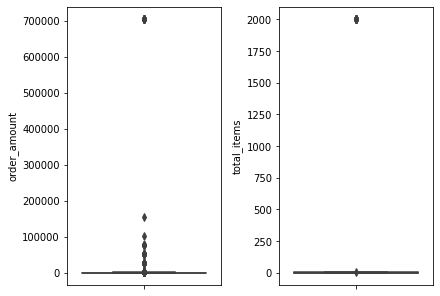

In [218]:
# visualize data
fig, (ax1, ax2) = plt.subplots(ncols=2, constrained_layout=True)
sns.boxplot(y=df['order_amount'], ax=ax1)
sns.boxplot(y=df['total_items'], ax=ax2)

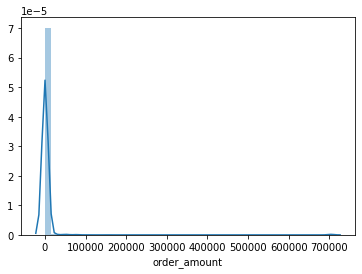

In [257]:
sns.distplot(df['order_amount'])

# Alternative Measure

In [214]:
df['order_amount'].median()

284.0

In [242]:
median_absolute_deviation(df['order_amount']).round(2)

174.95

# Other interesting stuff

In [217]:
# payment stats 
df[['payment_method', 'order_amount', 'total_items']].groupby('payment_method').agg(['sum', 'mean', 'count']).round(2)

order_amount                total_items             
                        sum     mean count         sum   mean count
payment_method                                                     
cash                1164183   730.35  1594        3130   1.96  1594
credit_card        12945867  7461.59  1735       37415  21.56  1735
debit               1615590   966.84  1671        3391   2.03  1671